In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
fipe_2022 = pd.read_csv('fipe_2022.csv')
fipe_cars = pd.read_csv('fipe_cars.csv')

In [26]:
fipe_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [27]:
fipe_cars.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


In [48]:
f'Quantidade de marcas únicas: {len(fipe_cars['brand'].unique())}'

'Quantidade de marcas únicas: 87'

In [49]:
# transformar em categoria pra tornar mais leve:
to_category = ['gear','brand','month_of_reference','fuel','engine_size']
fipe_cars[to_category] = fipe_cars[to_category].astype('category')

In [51]:
# economia de 20mb no memory usage.
fipe_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599007 entries, 0 to 599006
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   year_of_reference   599007 non-null  int64   
 1   month_of_reference  599007 non-null  category
 2   fipe_code           599007 non-null  object  
 3   authentication      599007 non-null  object  
 4   brand               599007 non-null  category
 5   model               599007 non-null  object  
 6   fuel                599007 non-null  category
 7   gear                599007 non-null  category
 8   engine_size         599007 non-null  category
 9   year_model          599007 non-null  int64   
 10  avg_price_brl       599007 non-null  float64 
dtypes: category(5), float64(1), int64(2), object(3)
memory usage: 30.3+ MB


<Axes: >

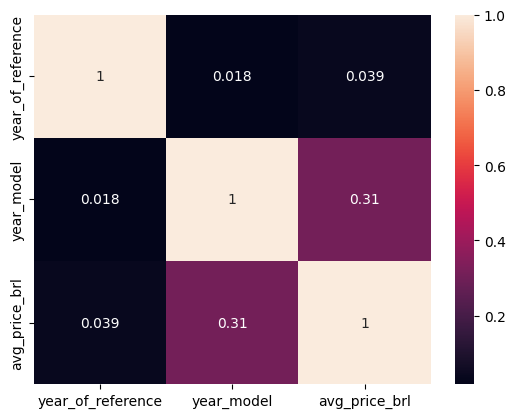

In [52]:
sns.heatmap(
    fipe_cars.corr(numeric_only=True),
    annot=True
)

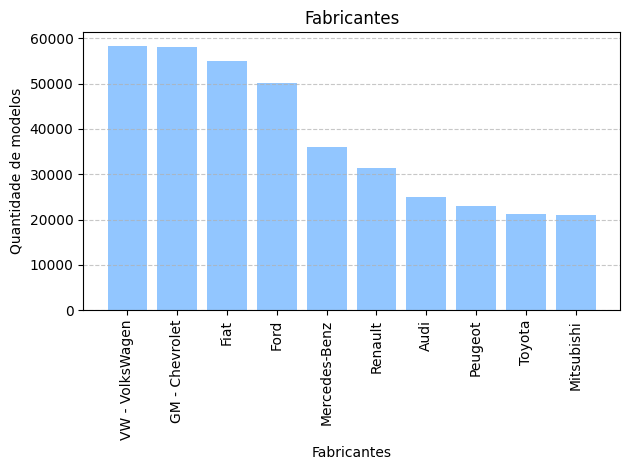

In [74]:
marcas = fipe_cars.groupby('brand', observed=False)
top10 = marcas.size().sort_values(ascending=False).iloc[:10]
top10

# plt.style.available
plt.style.use('seaborn-v0_8-pastel')

plt.bar(
    x=top10.index, 
    height=top10,
    )

# Adicionar título e rótulos aos eixos
plt.title('Fabricantes')
plt.xlabel('Fabricantes')
plt.ylabel('Quantidade de modelos')
plt.xticks(rotation=90)

# Exibir o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
vw = fipe_cars[fipe_cars['brand'] == 'VW - VolksWagen']

query01 = vw['model'].str.contains('Polo')
query02 = vw['year_model'] > 2019
query03 = vw['gear'] == 'manual'

polo = vw[query01 & query02 & query03].value_counts(subset='year_model').sort_index()
polo

year_model
2020    75
2021    81
2022    92
2023    50
Name: count, dtype: int64

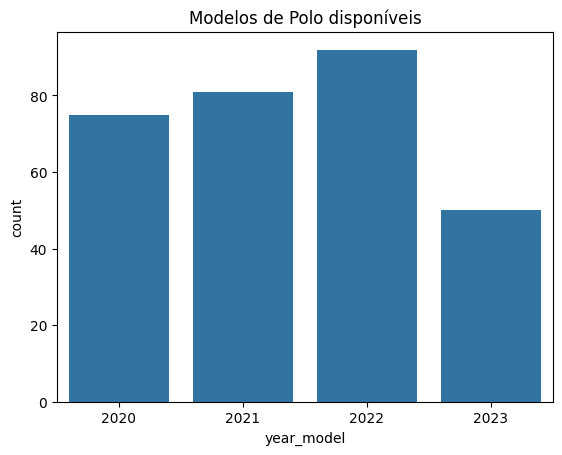

In [33]:
sns.barplot(polo)
plt.title('Modelos de Polo disponíveis')
plt.show()

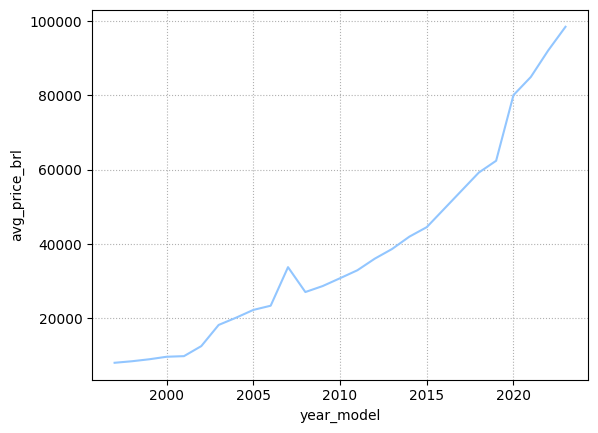

In [78]:
query01 = vw['model'].str.contains('Polo')
query02 = vw['gear'] == 'manual'

polo = vw[query01 & query02]
polo_avg = polo.groupby('year_model').agg({'avg_price_brl':'mean'})

sns.lineplot(
    polo_avg['avg_price_brl'].sort_index(ascending=True),
    )
plt.grid(ls=':')
